<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/part3_logesticregression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with pd.HDFStore('/content/drive/MyDrive/1000/part2_result',  mode='r') as newstore:
    result = newstore.select('result')

In [4]:
#final data
print(result)

             0         1         2  ...         8         9  label
0    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
1    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
2    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
3    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
4    -1.680599 -3.061217 -0.040984  ...  0.006186  0.002988      1
...        ...       ...       ...  ...       ...       ...    ...
1315 -1.680599 -3.061217 -0.040984  ... -0.035323 -0.015205      0
1316 -1.680599 -3.061217 -0.040984  ... -0.012077 -0.016767      0
1317 -1.680599 -3.061217 -0.040984  ... -0.011761 -0.013474      0
1318 -1.680599 -3.061217 -0.040984  ...  0.004503  0.113459      0
1319 -1.680599 -3.061217 -0.040984  ... -0.022880  0.001418      0

[1320 rows x 71 columns]


# **logestic** **regression**

In [5]:
#divide data in to data_label and non_data label

import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [6]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [7]:
#train the data

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [8]:
#score of data by prediction at once

predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9974747474747475


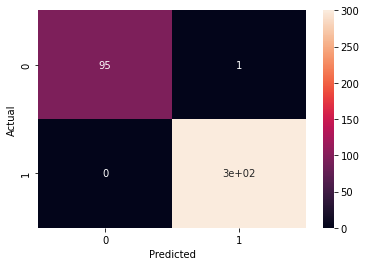

In [9]:
#plotting confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [10]:
#Accuracy by prediction in once

print('Accuracy: ',metrics.accuracy_score(y_test, predictions))


Accuracy:  0.9974747474747475


In [11]:
#cross_validation and accracy

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10)#, shuffle=True, random_state=42
scores = cross_val_score(logisticRegr, X, y, scoring='accuracy', cv=cv,n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.956 (0.105)


In [12]:
#recall

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict


cv = KFold(n_splits=10)#, shuffle=True, random_state=42
scores_recall = cross_val_score(logisticRegr,X, y, scoring='recall', cv=cv,n_jobs=-1)

print('scores_recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))

scores_recall: 0.764 (0.396)


In [13]:
#precision

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10)#, shuffle=True, random_state=42
scores_precision = cross_val_score(logisticRegr, X, y, scoring='precision', cv=cv,n_jobs=-1)

print('scores_precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))

scores_precision: 0.788 (0.394)


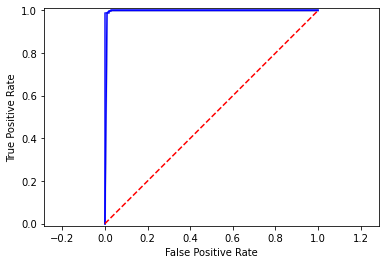


 roc_auc_score is:


0.9890835277946489

In [17]:
#auc_roc figure

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve


kf = KFold(n_splits=10)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(6, 4))
plt.axes().set_aspect('equal', 'datalim')

for i, (train, test) in enumerate(cv.split(X, y)):
    model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
    y_score = model.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])

    
    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('\n','roc_auc_score is:')

roc_auc_score(y_test, predictions)

In [15]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 300
False Positives: 1
True Negatives: 95
False Negatives: 0


In [16]:
#tpr_fpr


from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

def evaluate_model(X, y, repeats):
  cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)#
  model = LogisticRegression()
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

repeats = range(1,11)
results = list()
res_tpr = list()
res_fpr = list()
for r in repeats:
  scores = evaluate_model(X, y, r)
  print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
  results.append(scores)
  
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  logisticRegr = LogisticRegression(max_iter=10000)
  logisticRegr.fit(x_train, y_train)
  predictions = logisticRegr.predict(x_test)
  tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
  tpr=(tp/(tp+fn))
  fpr=(fp/(fp+tn))
  print('>%d tpr=%.4f fpr=%.3f' % (r, mean(tpr), mean(fpr)))
  print('x')
  res_tpr.append(mean(tpr))
  res_fpr.append(mean(fpr))

total_tpr=sum(res_tpr)/10
total_fpr=sum(res_fpr)/10
print('\n\n',' total_tpr=%.4f total_fpr=%.3f' % (total_tpr,total_fpr))

>1 mean=0.9788 se=0.006
>1 tpr=1.0000 fpr=0.069
x
>2 mean=0.9795 se=0.004
>2 tpr=1.0000 fpr=0.050
x
>3 mean=0.9811 se=0.003
>3 tpr=1.0000 fpr=0.027
x
>4 mean=0.9818 se=0.002
>4 tpr=0.9967 fpr=0.075
x
>5 mean=0.9823 se=0.002
>5 tpr=1.0000 fpr=0.062
x
>6 mean=0.9827 se=0.002
>6 tpr=0.9966 fpr=0.020
x
>7 mean=0.9828 se=0.002
>7 tpr=0.9967 fpr=0.032
x
>8 mean=0.9833 se=0.001
>8 tpr=1.0000 fpr=0.021
x
>9 mean=0.9830 se=0.001
>9 tpr=1.0000 fpr=0.072
x
>10 mean=0.9830 se=0.001
>10 tpr=0.9965 fpr=0.018
x


  total_tpr=0.9987 total_fpr=0.045
